# Fit using hiperbolic function

In [10]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [11]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['style', 'interp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Model

In [12]:
def model_function(x: float,a1: float,a2: float,a3: float):
    return a1*np.sqrt((x+a2)**2 + a3)

In [13]:
def get_extrapol_function(model_function,a1,a2,a3):
    def extrapol_funct(x):
        return model_function(x,a1,a2,a3)
    return extrapol_funct

## Read files

In [14]:
data_path = Path("../../../data/h-1").resolve()
file = 'all_inv_Tc_h-1.csv'
df_all_tc = pd.read_csv(os.path.join(data_path,file))

In [15]:
df_all_tc

,1/nv,P2.0
0,1.000000,0.482330
1,0.500000,0.407525
2,0.333333,0.378513
3,0.250000,0.362943
4,0.200000,0.353541
5,0.166667,0.346949
6,0.142857,0.342308
7,0.125000,0.338823
8,0.111111,0.336042
9,0.100000,0.333850


In [16]:
df_params_conicas = pd.DataFrame(index=["a1","a2","a3"])
df_extrapol_val = pd.DataFrame(index=["infty","1"])

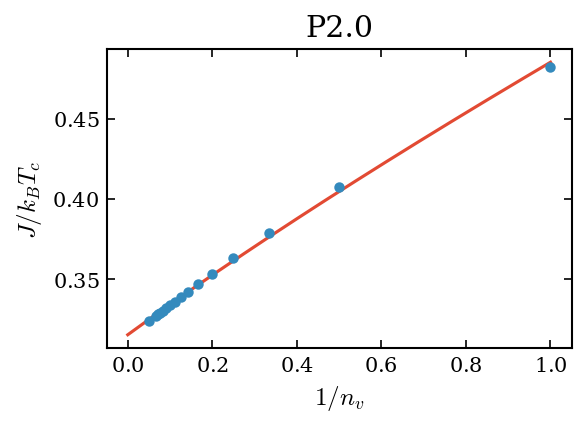

model_funt = (0.122)*((x+4.089)^2+-10.000^2)
Extrapolation:
0.31543375858539435 at 1/nv=0
0.485124714701027 at 1/nv=1
min:0.31543375858539435 at 0.0




In [17]:
COLUMNS = ["P2.0"]
path_save_graph = Path("../../../graphs/h-1").resolve()
file_name_base = 'inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms_v2'
for COLUMN in COLUMNS:
    file_graph = file_name_base + '_{}.png'.format(COLUMN)
    # Get the data in arrays
    df_part = df_all_tc[["1/nv",COLUMN]]
    df_part = df_part.dropna()
    x_data = df_part['1/nv'].values
    y_data = df_part[COLUMN].values
#     # add value at nv=1
#     x_data = np.concatenate([x_data,[1]])
#     y_data = np.concatenate([y_data,[1.19968]])
#     #add value at nv=infty
#     x_data = np.insert(x_data,0,0)
#     y_data = np.insert(y_data,0,0)

#     # for square
#     y_data = y_data**2    

    # fit 
    (a1,a2,a3), _= curve_fit(f=model_function,xdata=x_data,ydata=y_data,maxfev =10000,p0=[1,1,1],bounds = ((-10,-10,-10),(10,10,10)))
    df_params_conicas[COLUMN] = [a1,a2,a3]
    extrapol_funct = get_extrapol_function(model_function, a1, a2, a3)

    # define the point for graph
    x_extrapol = np.linspace(0, 1, 2048)
    y_extrapol = extrapol_funct(x_extrapol)

    # Load the default style.
    style.use("default")
    rcParams["text.usetex"] = False

    fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
    grid_spec = GridSpec(3, 1)

    # Specific heat subplot.
    ax: Axes = fig1.add_subplot(grid_spec[0, 0])

    ax.plot(x_extrapol, y_extrapol, lw=1.5)
    ax.plot(x_data, y_data, marker="o", lw=0)

    ax.set_xlabel(r"$1/n_v$")
    ax.set_ylabel(r"$J/k_BT_c$")

    ax.set_title(COLUMN)
    pyplot.draw()
#     print('Save graph {}'.format(os.path.join(path_save_graph,file_graph)))
#     pyplot.savefig(os.path.join(path_save_graph,file_graph))
    pyplot.show()
    print("model_funt = ({:.3f})*((x+{:.3f})^2+{:.3f}^2)".format(a1,a2,a3))
    print("Extrapolation:\n{} at 1/nv=0\n{} at 1/nv=1".format(extrapol_funct(0),extrapol_funct(1)))
    df_extrapol_val[COLUMN] = [extrapol_funct(0),extrapol_funct(1)]  
    print("min:{} at {}".format(np.nanmin(y_extrapol),x_extrapol[np.nanargmin(y_extrapol)]))    
    print("\n")


## Save params

In [19]:
# Define tha path and name for the csv files
file_params = os.path.join(data_path,'Extrapolation',file_name_base+'_params_curves.csv')
file_extrapol_values = os.path.join(data_path,'Extrapolation',file_name_base+'_extrapol_values.csv')
print(df_params_conicas)
print("Exporting to csv files the params adjusted {}".format(file_params))
df_params_conicas.to_csv(file_params)
print(df_extrapol_val)
print("Exporting to csv files the extrapolation values adjusted {}".format(file_extrapol_values))
df_extrapol_val.to_csv(file_extrapol_values)

         P2.0
a1   0.090188
a2   8.100728
a3 -53.543186
Exporting to csv files the params adjusted C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\Extrapolation\inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms_v2_params_curves.csv
           P2.0
infty  0.313441
1      0.488015
Exporting to csv files the extrapolation values adjusted C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\Extrapolation\inv_Tc_vs_inv_nv_extrapol_hiperbolic_3_parms_v2_extrapol_values.csv


## Plot extrapol values

Save graph C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\graphs\Extrapolation\square_inv_Tc_vs_inv_nv_extrapol_parabolic_3_parms_with_nv-1_v2_all_p.png


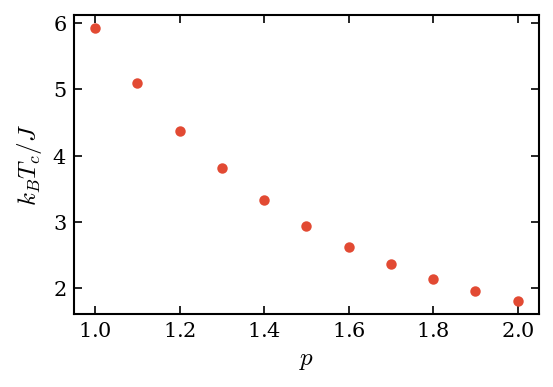

In [12]:
file_extrapol_graph = os.path.join(path_save_graph,'Extrapolation',file_name_base+'_all_p.png')
# data 
x_data = np.arange(1,2.1,0.1)
y_data = 1/df_extrapol_val.loc['infty'].values

# data for squared 
y_data = np.sqrt(y_data)

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x_data, y_data, marker="o", lw=0)

ax.set_xlabel(r"$p$")
ax.set_ylabel(r"$k_BT_c/J$")

pyplot.draw()

print('Save graph {}'.format(file_extrapol_graph))
pyplot.savefig(file_extrapol_graph)

pyplot.show()